# Proyek Analisis Data : Bike-sharing-dataset

- **Nama** : Mochammad Syafiq Ilallah
- **Email** : mochammadsyafiq@student.ub.ac.id
- **ID Cohort** : mochammad_syafiq_i
- **Cohort ID** : MC006D5Y2189
- **Kelas** : MC-36


## Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh kondisi cuaca (weathersit) terhadap jumlah penyewaan sepeda (cnt) di Washington D.C.?
>Pertanyaan ini ingin menjawab apakah kondisi cuaca seperti cerah, mendung, hujan ringan, atau hujan lebat mempengaruhi jumlah penyewaan sepeda di Washington D.C. Dengan menganalisis data, kita dapat mengetahui apakah orang lebih cenderung menyewa sepeda pada kondisi cuaca tertentu.
2. Bagaimana pola penggunaan sepeda berdasarkan musim (season) di Washington D.C.?
>Pertanyaan ini ingin menjawab apakah ada pola penggunaan sepeda yang berbeda di setiap musim (semi, panas, gugur, dan dingin) di Washington D.C. Dengan menganalisis data, kita dapat mengetahui musim dengan jumlah penyewaan tertinggi dan terendah, serta memahami faktor yang mungkin mempengaruhinya.
3. Bagaimana tren penyewaan sepeda pada hari kerja dibandingkan dengan akhir pekan di Washington D.C.?
>Pertanyaan ini ingin menjawab apakah terdapat perbedaan jumlah penyewaan sepeda antara hari kerja dan akhir pekan. Dengan menganalisis data, kita dapat mengetahui apakah pengguna lebih sering menyewa sepeda saat hari kerja untuk keperluan transportasi atau lebih banyak digunakan untuk rekreasi di akhir pekan.


## Import Semua Packages/Library yang Digunakan

In [582]:
# Packages yang dibutuhkan yaitu : numpy, pandas, matplotlib, seaborn, dan streamlit (berguna untuk file.py)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [583]:
# Buka file day.csv dan simpan dalam variabel day_df
day_df=pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [584]:
# Buka file hour.csv dan simpan dalam variabel hour_df
hour_df=pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight Gathering Data**:

Dataset terdiri dari dua tingkat agregasi, yaitu data harian (day.csv) yang merupakan hasil agregasi dari data per jam (hour.csv). Data ini telah dinormalisasi, sehingga untuk mendapatkan nilai aslinya, suhu (temp) dikalikan 41, suhu terasa (atemp) dikalikan 50, kelembaban (hum) dikalikan 100, dan kecepatan angin (windspeed) dikalikan 67.

Relasi Data Harian (day.csv) dan Data Per Jam (hour.csv)
Nilai suhu (temp), suhu terasa (atemp), kelembaban (hum), dan kecepatan angin (windspeed) dalam day.csv diperoleh dari rata-rata nilai per hari dalam hour.csv. Sementara itu, kondisi cuaca (weathersit) dalam day.csv diambil dari nilai modus harian, dan jumlah penyewaan sepeda (casual, registered, dan cnt) merupakan hasil penjumlahan dari nilai per jam dalam hour.csv.

Dataset ini memiliki variabel waktu, numerik, dan kategori yang dapat dikelompokkan lebih lanjut berdasarkan sifatnya.

Variabel yang berkaitan dengan waktu meliputi tanggal spesifik (dteday), tahun (yr), bulan (mnth), musim (season), hari dalam seminggu (weekday), hari libur (holiday), dan status hari kerja (workingday). Variabel yr dan mnth dapat dikombinasikan untuk membentuk dteday, sementara holiday dan workingday bersifat biner karena hanya memiliki dua kemungkinan nilai, yaitu 0 atau 1.

Variabel numerik dalam dataset terbagi menjadi variabel diskrit, ordinal, dan kontinu. Variabel diskrit mencakup jumlah penyewaan sepeda, baik oleh pengguna tidak terdaftar (casual), pengguna terdaftar (registered), maupun total penyewaan (cnt). Variabel ordinal adalah kondisi cuaca (weathersit), yang memiliki tingkatan dari cerah hingga hujan deras atau salju. Sedangkan variabel kontinu meliputi suhu (temp), suhu terasa (atemp), kelembaban (hum), dan kecepatan angin (windspeed), karena nilainya bisa berupa angka desimal dalam rentang tertentu.



### Assessing Data


#### Menilai tabel `day_df`

##### Tipe data `day_df`

In [585]:
# Pemeriksaan Tipe Data dari tiap kolom yang terdapat day_df.
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight Tipe `day_df`** 

Pemeriksaan tipe data : dteday saat ini memiliki tipe data object (string).Sebaiknya dikonversi ke datetime agar bisa digunakan untuk analisis berbasis waktu.



##### Missing Value `day_df`

In [586]:
# Pemeriksaan missing value dari tiap kolom yang terdapat dalam day_df.
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight Missing Value `day_df`** 

Pemeriksaan missing value : Tidak terdapat missing value pada data day_df.



##### Duplikasi data `day_df`

In [587]:
# Pemeriksaan duplikasi data dari tiap kolom yang terdapat dalam day_df.
print('Jumlah Duplikasi :', day_df.duplicated().sum())

Jumlah Duplikasi : 0


**Insight Duplikasi `day_df`** 

Pemeriksaan duplikasi data : Tidak terdapat duplikasi pada data day_df.


##### Parameter statistik dari `day_df`

In [588]:
# Pemeriksaan parameter statistik dari kolom numerik yang terdapat dalam day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight Parameter statistika `day_df`** 

Pemeriksaan parameter statistik : Tidak ada keanehan pada data day_df karena data tersebut sudah di normalisasikan.



##### Invalid value `day_df`


In [589]:
# Pemeriksaan apakah ada invalid value pada data day_df
def check_invalid_values_day(day_df):
    print("Season (Harus 1, 2, 3, 4):", day_df['season'].unique())
    print("Weather (Harus 1, 2, 3, 4):", day_df['weathersit'].unique())
    print("Temperature < 0:" , day_df[day_df['temp'] < 0])
    print("Humidity > 1 atau < 0:" , day_df[(day_df['hum'] < 0) | (day_df['hum'] > 1)])

# pemanggilan fungsi
check_invalid_values_day(day_df)

Season (Harus 1, 2, 3, 4): [1 2 3 4]
Weather (Harus 1, 2, 3, 4): [2 1 3]
Temperature < 0: Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
Humidity > 1 atau < 0: Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


**Insight Invalid Value `day_df`** 

Pemeriksaan invalid value : pada data day_df tidak ditemukan invalid value.


##### Inaccurate value `day_df`


In [590]:
# Pemeriksaan apakah ada inaccurate value pada data day_df
def check_inaccurate_values_day(day_df):
    print("Kecepatan angin 0 m/s: ", day_df[day_df['windspeed'] == 0])  # kecepatan angin 0 m/s mungkin terjadi dalam kondisi tertentu tetapi sepertinya jarang sekali
    print("\nCnt lebih besar dari casual + registered: ", day_df[day_df['cnt'] > (day_df['casual'] + day_df['registered'])])  # mengecek apakah jumlah total peminjam (cnt) lebih besar dari jumlah peminjam di kategori casual dan registered   
# pemanggilan fungsi
check_inaccurate_values_day(day_df)

Kecepatan angin 0 m/s:  Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

Cnt lebih besar dari casual + registered:  Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


**Insight Inaccurate Value `day_df`** 

Pemeriksaan inaccurate value : Tidak terdapat nilai inaccurate yang terjadi pada data day_df.


##### Outlier `day_df`

In [591]:
 
# Hitung Q1 (Kuartil 1) dan Q3 (Kuartil 3) untuk dataset day
Q1_day = day_df['cnt'].quantile(0.25)
Q3_day = day_df['cnt'].quantile(0.75)
IQR_day = Q3_day - Q1_day

# Tentukan batas bawah dan batas atas untuk dataset day
lower_bound_day = Q1_day - 1.5 * IQR_day
upper_bound_day = Q3_day + 1.5 * IQR_day

# Filter outlier untuk dataset day
outliers_day = day_df[(day_df['cnt'] < lower_bound_day) | (day_df['cnt'] > upper_bound_day)]

# Hitung jumlah outlier untuk dataset day
num_outliers_day = len(outliers_day)

# Cetak jumlah outlier untuk dataset day
print(f"Jumlah outlier untuk dataset day: {num_outliers_day}")

Jumlah outlier untuk dataset day: 0


**Insight Outlier Value `day_df`** 

Pemeriksaan Outlier :jumlah outlier untuk data day_df yaitu 0 maka dapat dipastikan day_df tidak memiliki outlier.

#### Menilai tabel `hour_df`

##### Tipe data `hour_df`


In [592]:
# Pemeriksaan Tipe Data dari tiap kolom yang terdapat hour_df.
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight Tipe data hour_df** 

Pemeriksaan tipe data : dteday saat ini memiliki tipe data object (string).Sebaiknya dikonversi ke datetime agar bisa digunakan untuk analisis berbasis waktu.


##### Missing value `hour_df`

In [593]:
# Pemeriksaan missing value dari tiap kolom yang terdapat dalam hour_df.
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight Missing Value hour_df** :

Pemeriksaan missing value : Tidak terdapat missing value pada data hour_df.


##### Duplikasi data `hour_df`

In [594]:
# Pemeriksaan duplikasi data dari tiap kolom yang terdapat dalam hour_df.
print('Jumlah Duplikasi :', hour_df.duplicated().sum())

Jumlah Duplikasi : 0


**Insight Duplikasi data hour_df** :

Pemeriksaan duplikasi data : Tidak terdapat duplikasi pada data hour_df


##### parameter statistik dari `hour_df`

In [595]:
# Pemeriksaan parameter statistik dari kolom numerik yang terdapat dalam hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight Parameter statistik hour_df** :

Pemeriksaan parameter statistik : Tidak ada keanehan pada kolom data hour_df karena data tersebut sudah di normalisasikan.


##### Invalid value `hour_df`

In [596]:
# Memeriksa apakah ada nilai invalid pada data hour_df
def check_invalid_values_hour(hour_df):
    print("Season (Harus 1, 2, 3, 4):", hour_df['season'].unique())
    print("Weather (Harus 1, 2, 3, 4):", hour_df['weathersit'].unique())
    print("Temperature < 0:", hour_df[hour_df['temp'] < 0])
    print("Humidity > 1 atau < 0:", hour_df[(hour_df['hum'] < 0) | (hour_df['hum'] > 1)])

# pemanggilan fungsi
check_invalid_values_hour(hour_df)

Season (Harus 1, 2, 3, 4): [1 2 3 4]
Weather (Harus 1, 2, 3, 4): [1 2 3 4]
Temperature < 0: Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
Humidity > 1 atau < 0: Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


**Insight Invalid Value hour_df** :

Pemeriksaan invalid value : pada data hour_df tidak di temukan invalid value.


##### Inaccurate value `hour_df`

In [597]:
# Pemeriksaan apakah ada inaccurate value pada data hour_df
def check_inaccurate_values_hour(hour_df):
    print("Kecepatan angin 0 m/s: ", hour_df[hour_df['windspeed'] == 0])  # kecepatan angin 0 m/s mungkin terjadi dalam kondisi tertentu tetapi sepertinya jarang sekali
    print("\nCnt lebih kecil dari casual + registered: ", hour_df[hour_df['cnt'] < (hour_df['casual'] + hour_df['registered'])])  # mengecek apakah jumlah total peminjam (cnt) lebih kecil dari jumlah peminjam di kategori casual dan registered   
# pemanggilan fungsi
check_inaccurate_values_hour(hour_df)

Kecepatan angin 0 m/s:         instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17319    17320  2012-12-29       1   1    12  12        0        6   
17320    17321  2012-12-29       1   1    12  13        0        6   
17322    17323  2012-12-29       1   1    12  15        0        6   
17330    17331  2012-12-29       1   1    12  23        0        6   
17350    17351  2012-12-30       1   1    12  19        0        0   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81        0.0   

**Insight Inaccurate Value hour_df** :

Pemeriksaan inaccurate value : pada data hour_df terdapat nilai 0 pada kolom windspeed dan diketahui ada 2130 baris.

##### Outlier `hour_df`

In [598]:
# Hitung Q1 (Kuartil 1) dan Q3 (Kuartil 3) untuk dataset hour
Q1_hour = hour_df['cnt'].quantile(0.25)
Q3_hour = hour_df['cnt'].quantile(0.75)
IQR_hour = Q3_hour - Q1_hour

# Tentukan batas bawah dan batas atas untuk dataset hour
lower_bound_hour = Q1_hour - 1.5 * IQR_hour
upper_bound_hour = Q3_hour + 1.5 * IQR_hour

# Filter outlier untuk dataset hour
outliers_hour = hour_df[(hour_df['cnt'] < lower_bound_hour) | (hour_df['cnt'] > upper_bound_hour)]

# Hitung jumlah outlier untuk dataset hour
num_outliers_hour = len(outliers_hour)

# Tampilkan hasil    
print(f"Jumlah outlier pada dataset hour: {num_outliers_hour}")

Jumlah outlier pada dataset hour: 505


**Insight Outlier hour_df** :

Pemeriksaan Outlier : pada data hour_df terdapat outlier sebanyak 505 yang mana dapat diartikan terdapat  kesalahan pengukuran, atau variabel yang tidak sesuai dengan populasi utama.

### Cleaning Data


#### Membersihkan tabel `day_df`

In [599]:
#Pemeriksaan Tipe Data dari tiap kolom yang terdapat day_df.
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


##### Memperbaiki tipe data `day_df`

In [600]:
#Mengganti tipe data pada kolom dteday menjadi datetime
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [601]:
#Pemeriksaan Tipe Data dari tiap kolom yang terdapat day_df.
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [602]:
#Menampilkan tabel day_df
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight membersihkan tabel day_df** :
Pada tahap mengubah dteday yang awalnya memiliki tipe data object (string), dikonversikan ke datetime agar bisa digunakan untuk analisis berbasis waktu.

#### Membersihkan tabel `hour_df`


In [603]:
#Pemeriksaan Tipe Data dari tiap kolom yang terdapat hour_df.
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


##### Memperbaiki tipe data `hour_df`


In [604]:
#Mengganti tipe data pada kolom dteday menjadi datetime
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [605]:
#Pemeriksaan Tipe Data dari tiap kolom yang terdapat hour_df.
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [606]:
#Menampilkan tabel hour_df
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight membersihkan tabel hour_df** :
Pada tahap mengubah dteday yang awalnya memiliki tipe data object (string), dikonversikan ke datetime agar bisa digunakan untuk analisis berbasis waktu.

## Exploratory Data Analysis (EDA)

#### Explore `day_df`

In [607]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [608]:
# Explore dari day_df
daily_agg = day_df.groupby(by="dteday").agg({
    "weathersit": lambda x: x.mode()[0],  # Mengambil modus kondisi cuaca
    "temp": "mean",          # Rata-rata suhu
    "atemp": "mean",         # Rata-rata suhu yang dirasakan
    "hum": "mean",           # Rata-rata kelembapan
    "windspeed": "mean",     # Rata-rata kecepatan angin
    "casual": "sum",         # Total pengguna casual harian
    "registered": "sum",     # Total pengguna terdaftar harian
    "cnt": "sum"             # Total penyewaan harian
}).reset_index()

# Menampilkan hasil
print(daily_agg.head())

      dteday  weathersit      temp     atemp       hum  windspeed  casual  \
0 2011-01-01           2  0.344167  0.363625  0.805833   0.160446     331   
1 2011-01-02           2  0.363478  0.353739  0.696087   0.248539     131   
2 2011-01-03           1  0.196364  0.189405  0.437273   0.248309     120   
3 2011-01-04           1  0.200000  0.212122  0.590435   0.160296     108   
4 2011-01-05           1  0.226957  0.229270  0.436957   0.186900      82   

   registered   cnt  
0         654   985  
1         670   801  
2        1229  1349  
3        1454  1562  
4        1518  1600  


#### Explore `hour_df`

In [609]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [610]:
# Explore dari hour_df
hourly_agg = hour_df.groupby(by="dteday").agg({
    "weathersit": lambda x: x.mode()[0],  # Mengambil modus kondisi cuaca
    "temp": "mean",          # Rata-rata suhu
    "atemp": "mean",         # Rata-rata suhu yang dirasakan
    "hum": "mean",           # Rata-rata kelembapan
    "windspeed": "mean",     # Rata-rata kecepatan angin
    "casual": "sum",         # Total pengguna casual harian
    "registered": "sum",     # Total pengguna terdaftar harian
    "cnt": "sum"             # Total penyewaan harian
}).reset_index()

# Menampilkan hasil
hourly_agg.head()

,dteday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Penggabungan explore `day_df` & `hour_df`


##### Data merging 1


Pada proses merging ini, kita akan menggabungkan dua dataset, yaitu `day_df` dan `hour_df`.  
Tujuan utama dari penggabungan ini adalah untuk memeriksa apakah suatu data merupakan selisih antara nilai yang terdapat dalam `day_df` dan `hour_df`.  
Dengan demikian, kita dapat memperoleh informasi yang lebih komprehensif dan melakukan analisis lebih lanjut berdasarkan hasil perbedaan antara kedua dataset tersebut.  

In [611]:
# Gabungkan data eksplorasi dari day_df dan hour_df berdasarkan dteday
merged_agg = daily_agg.merge(hourly_agg, on="dteday", suffixes=("_day", "_hour"))

# Menampilkan hasil
print(merged_agg.head())

      dteday  weathersit_day  temp_day  atemp_day   hum_day  windspeed_day  \
0 2011-01-01               2  0.344167   0.363625  0.805833       0.160446   
1 2011-01-02               2  0.363478   0.353739  0.696087       0.248539   
2 2011-01-03               1  0.196364   0.189405  0.437273       0.248309   
3 2011-01-04               1  0.200000   0.212122  0.590435       0.160296   
4 2011-01-05               1  0.226957   0.229270  0.436957       0.186900   

   casual_day  registered_day  cnt_day  weathersit_hour  temp_hour  \
0         331             654      985                1   0.344167   
1         131             670      801                2   0.363478   
2         120            1229     1349                1   0.196364   
3         108            1454     1562                1   0.200000   
4          82            1518     1600                1   0.226957   

   atemp_hour  hum_hour  windspeed_hour  casual_hour  registered_hour  \
0    0.363625  0.805833        0.1604

**Menghitung selisih antara nilai data `day_df` dan  `hour_df`**

In [612]:
# Hitung selisih antara nilai di day_df dan hasil agregasi dari hour_df
merged_agg["temp_diff"] = merged_agg["temp_day"] - merged_agg["temp_hour"]
merged_agg["atemp_diff"] = merged_agg["atemp_day"] - merged_agg["atemp_hour"]
merged_agg["hum_diff"] = merged_agg["hum_day"] - merged_agg["hum_hour"]
merged_agg["windspeed_diff"] = merged_agg["windspeed_day"] - merged_agg["windspeed_hour"]
merged_agg["weathersit_diff"] = merged_agg["weathersit_day"] - merged_agg["weathersit_hour"]
merged_agg["casual_diff"] = merged_agg["casual_day"] - merged_agg["casual_hour"]
merged_agg["registered_diff"] = merged_agg["registered_day"] - merged_agg["registered_hour"]
merged_agg["cnt_diff"] = merged_agg["cnt_day"] - merged_agg["cnt_hour"]

# Periksa apakah semua selisih mendekati nol
print(merged_agg[["temp_diff", "atemp_diff", "hum_diff", "windspeed_diff", 
                  "weathersit_diff", "casual_diff", "registered_diff", "cnt_diff"]].describe())


          temp_diff    atemp_diff      hum_diff  windspeed_diff  \
count  7.310000e+02  7.310000e+02  7.310000e+02    7.310000e+02   
mean   1.779739e-11  1.000772e-08 -2.622606e-09   -1.443825e-08   
std    2.736837e-07  2.931941e-07  2.751549e-07    2.694124e-07   
min   -4.782609e-07 -5.000000e-07 -5.217391e-07   -5.000000e-07   
25%   -3.333333e-07 -1.666667e-07 -3.333333e-07   -1.666667e-07   
50%    0.000000e+00  0.000000e+00  0.000000e+00    0.000000e+00   
75%    3.333333e-07  2.608696e-07  3.333333e-07    1.666667e-07   
max    4.782609e-07  5.000000e-07  4.782609e-07    5.000000e-07   

       weathersit_diff  casual_diff  registered_diff  cnt_diff  
count       731.000000        731.0            731.0     731.0  
mean          0.097127          0.0              0.0       0.0  
std           0.355204          0.0              0.0       0.0  
min          -1.000000          0.0              0.0       0.0  
25%           0.000000          0.0              0.0       0.0  
50%   

**Insight EDA** :

**1. Data Temperatur, Kelembapan, dan Kecepatan Angin Sangat Konsisten.**
> Hasil analisis menunjukkan bahwa perbedaan antara data harian (day_df) dan hasil agregasi dari data per jam (hour_df) sangat kecil, hampir nol.
- Rata-rata selisih (mean) untuk temperatur (temp & atemp), kelembapan (hum), dan kecepatan angin (windspeed) hampir nol.
- Standar deviasi (std) juga sangat kecil, menandakan tidak ada perbedaan berarti.
- Rentang selisih berkisar antara -5e-7 hingga 5e-7, menunjukkan bahwa metode agregasi menggunakan rata-rata telah berjalan dengan baik.

**2. Perbedaan dalam Kondisi Cuaca (Weathersit) Terjadi di Beberapa Kasus**
> Berbeda dengan temperatur dan kelembapan, kondisi cuaca yang tercatat di data harian sedikit berbeda dibanding hasil agregasi dari data per jam.
- Rata-rata selisih (mean) tercatat sebesar 0.097127, yang berarti ada beberapa hari di mana kategori cuaca tidak selalu sama.
- Rentang perbedaan berada di antara -1 hingga 1, yang menunjukkan bahwa kondisi cuaca bisa berubah dalam sehari, tetapi data agregasi tidak selalu menangkap variasinya.
- Hal ini mungkin terjadi karena metode agregasi menggunakan modus (nilai yang paling sering muncul), yang tidak selalu mencerminkan perubahan cuaca yang lebih dinamis dalam satu hari.

**3. Data Penyewaan Sepeda Sepenuhnya Konsisten**
>Tidak ada perbedaan antara jumlah penyewaan sepeda harian dan hasil agregasi dari data per jam.
- Selisih antara pengguna biasa (casual_diff), pengguna terdaftar (registered_diff), dan total penyewaan (cnt_diff) semuanya nol.
- Artinya, data harian benar-benar merupakan hasil penjumlahan dari data per jam, sehingga bisa digunakan dengan percaya diri untuk analisis tren penyewaan.

**4. Hubungan antara Cuaca dan Penyewaan Sepeda**
- Temperatur, kelembapan, dan kecepatan angin tidak menunjukkan perbedaan signifikan antara data harian dan per jam, sehingga rata-rata harian cukup mewakili kondisi cuaca dalam sehari.
- Namun, kondisi cuaca (weathersit) yang lebih dinamis (misalnya hujan tiba-tiba atau badai) bisa mempengaruhi jumlah penyewaan sepeda dalam sehari, tetapi mungkin tidak sepenuhnya tergambar dalam data agregat.

##### Data Merging 2

Proses Data Merging 2 merupakan tahap penggabungan data dari hour_df dan day_df yang telah melalui proses eksplorasi. Penggabungan ini bertujuan untuk membentuk dataset baru yang lebih komprehensif, sehingga dapat digunakan dalam proses visualisasi data guna mendapatkan wawasan yang lebih mendalam.

In [613]:
# Buat rentang waktu yang diharapkan
merged_data = pd.DataFrame({
    "timestamp": pd.date_range(start="2011-01-01", end="2012-12-31 23:00:00", freq="h")
})
merged_data["dteday"] = merged_data["timestamp"].dt.date
merged_data["hr"] = merged_data["timestamp"].dt.hour
merged_data["dteday"] = pd.to_datetime(merged_data["dteday"])

# Gabungkan data jam dengan rentang waktu lengkap
merged_data = merged_data.merge(hour_df, on=["dteday", "hr"], how="left")

# menampilkan hasil
merged_data.head()

,timestamp,dteday,hr,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01 00:00:00,2011-01-01,0,1.0,1.0,0.0,1.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0,3.0,13.0,16.0
1,2011-01-01 01:00:00,2011-01-01,1,2.0,1.0,0.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,2011-01-01 02:00:00,2011-01-01,2,3.0,1.0,0.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,2011-01-01 03:00:00,2011-01-01,3,4.0,1.0,0.0,1.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,2011-01-01 04:00:00,2011-01-01,4,5.0,1.0,0.0,1.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


In [614]:
# Hapus kolom yang tidak diperlukan
drop_columns = [col for col in merged_data.columns if col not in ["dteday", "season", "yr", "hr", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]]
merged_data.drop(columns=drop_columns, inplace=True)



In [615]:
# Gabungkan data daily_agg dengan data hour_df
merged_data = merged_data.merge(daily_agg, on="dteday", how="left", suffixes=("", "_daily"))
merged_data.head

<bound method NDFrame.head of           dteday  hr  season   yr  workingday  weathersit  temp   atemp   hum  \
0     2011-01-01   0     1.0  0.0         0.0         1.0  0.24  0.2879  0.81   
1     2011-01-01   1     1.0  0.0         0.0         1.0  0.22  0.2727  0.80   
2     2011-01-01   2     1.0  0.0         0.0         1.0  0.22  0.2727  0.80   
3     2011-01-01   3     1.0  0.0         0.0         1.0  0.24  0.2879  0.75   
4     2011-01-01   4     1.0  0.0         0.0         1.0  0.24  0.2879  0.75   
...          ...  ..     ...  ...         ...         ...   ...     ...   ...   
17539 2012-12-31  19     1.0  1.0         1.0         2.0  0.26  0.2576  0.60   
17540 2012-12-31  20     1.0  1.0         1.0         2.0  0.26  0.2576  0.60   
17541 2012-12-31  21     1.0  1.0         1.0         1.0  0.26  0.2576  0.60   
17542 2012-12-31  22     1.0  1.0         1.0         1.0  0.26  0.2727  0.56   
17543 2012-12-31  23     1.0  1.0         1.0         1.0  0.26  0.2727  0.65  

In [616]:
# Hapus kolom yang tidak diperlukan setelah penggabungan
drop_columns_after_merge = [col for col in merged_data.columns if col not in ["dteday", "season", "yr", "hr", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]]
merged_data.drop(columns=drop_columns_after_merge, inplace=True)

# menampilkan hasil
merged_data.head()

,dteday,hr,season,yr,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,0,1.0,0.0,0.0,1.0,0.24,0.2879,0.81,0.0,3.0,13.0,16.0
1,2011-01-01,1,1.0,0.0,0.0,1.0,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,2011-01-01,2,1.0,0.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,2011-01-01,3,1.0,0.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,2011-01-01,4,1.0,0.0,0.0,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


In [617]:
# Isi nilai yang hilang dengan data daily_agg
merged_data.fillna(method="ffill", inplace=True)




C:\Users\Syafiq\AppData\Local\Temp\ipykernel_8936\26093346.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data.fillna(method="ffill", inplace=True)


In [618]:
# Simpan hasil
merged_data.to_csv("dashboard/all_data.csv", index=False)
print("Data hasil merging disimpan di dashboard/all_data.csv")

Data hasil merging disimpan di dashboard/all_data.csv


**Insight Data Merging 2** : dari proses merging output yang di keluarkan yaitu sebuat data csv yang dimana diberi nama all_data.csv yang digunakan untuk proses visualisasi data.


## Visualisasi Data

#### Pertanyaan 1 : Bagaimana pengaruh kondisi cuaca (weathersit) terhadap jumlah penyewaan sepeda (cnt) di Washington D.C.?

In [619]:
df = pd.read_csv("dashboard/all_data.csv")

# Mapping angka ke label kondisi cuaca dalam bahasa Indonesia
weather_labels = {
    1: "Cerah, Sedikit Berawan",
    2: "Berkabut, Berawan",
    3: "Salju Ringan, Hujan Ringan",
    4: "Hujan Lebat, Es"
}

# Mengelompokkan data berdasarkan kondisi cuaca dan menghitung total penyewaan sepeda
weather_rentals_df = df.groupby("weathersit").agg({
    "cnt": "sum"
})

# Mengubah nama kolom agar lebih jelas
weather_rentals_df.rename(columns={"cnt": "total_rentals"}, inplace=True)

# Mengubah angka menjadi label cuaca
weather_rentals_df.index = weather_rentals_df.index.map(weather_labels)

# Mereset index agar tampilan lebih rapi
weather_rentals_df = weather_rentals_df.reset_index()
weather_rentals_df.rename(columns={"weathersit": "Kondisi Cuaca"}, inplace=True)

# Menampilkan hasil 
weather_rentals_df.head()


,Kondisi Cuaca,total_rentals
0,"Cerah, Sedikit Berawan",2338400.0
1,"Berkabut, Berawan",796014.0
2,"Salju Ringan, Hujan Ringan",160040.0
3,"Hujan Lebat, Es",223.0


C:\Users\Syafiq\AppData\Local\Temp\ipykernel_8936\101570129.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


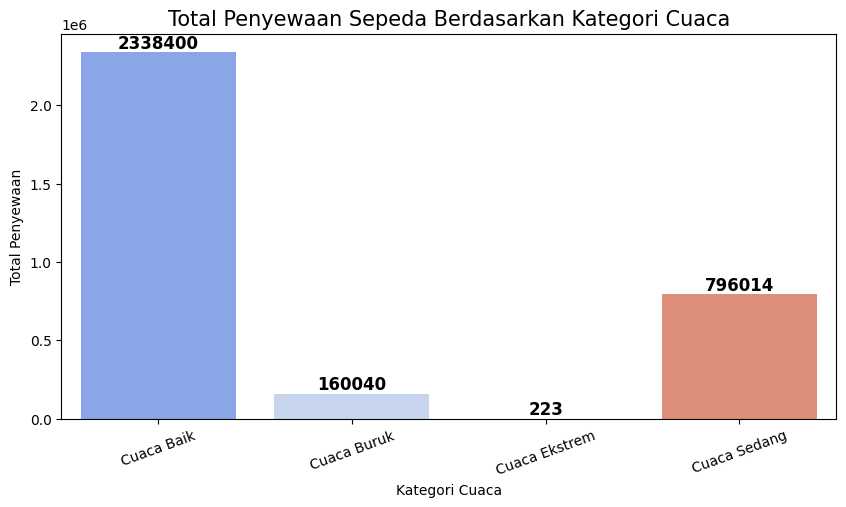

In [620]:
# Melakukan binning untuk kondisi cuaca
def weather_binning(weather):
    if weather in ["Cerah, Sedikit Berawan"]:
        return "Cuaca Baik"
    elif weather in ["Berkabut, Berawan"]:
        return "Cuaca Sedang"
    elif weather in ["Salju Ringan, Hujan Ringan"]:
        return "Cuaca Buruk"
    elif weather in ["Hujan Lebat, Es"]:
        return "Cuaca Ekstrem"
    else:
        return "Tidak Diketahui"

weather_rentals_df["Kategori Cuaca"] = weather_rentals_df["Kondisi Cuaca"].apply(weather_binning)

# Plot jumlah penyewaan sepeda berdasarkan kategori cuaca
plt.figure(figsize=(10, 5))
sns.barplot(
    y="total_rentals", 
    x="Kategori Cuaca",
    data=weather_rentals_df.groupby("Kategori Cuaca").sum().reset_index(),
    palette="coolwarm"
)
plt.title("Total Penyewaan Sepeda Berdasarkan Kategori Cuaca", loc="center", fontsize=15)
plt.xlabel("Kategori Cuaca")
plt.ylabel("Total Penyewaan")
plt.xticks(rotation=20)

# Menampilkan angka di atas setiap batang
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.show()

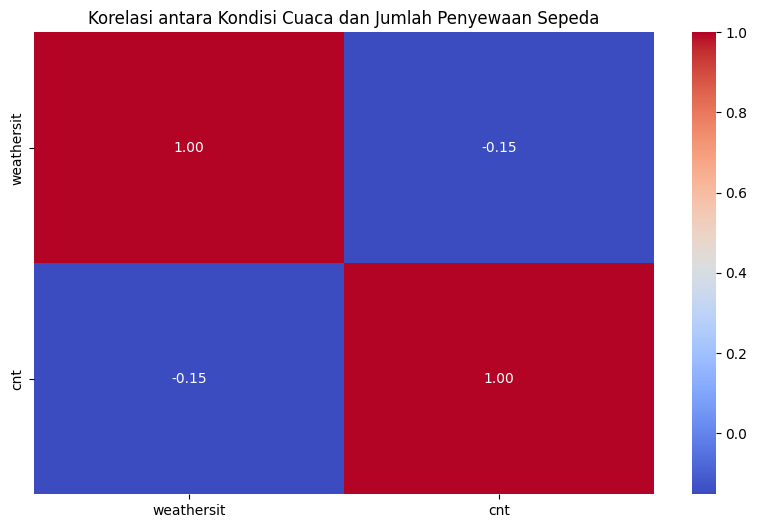

In [621]:
# Heatmap Korelasi antara kondisi cuaca dan jumlah penyewaan sepeda
df["weathersit_label"] = df["weathersit"].map(weather_labels)
korelasi_df = df[["weathersit", "cnt"]].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(korelasi_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Korelasi antara Kondisi Cuaca dan Jumlah Penyewaan Sepeda")
plt.show()

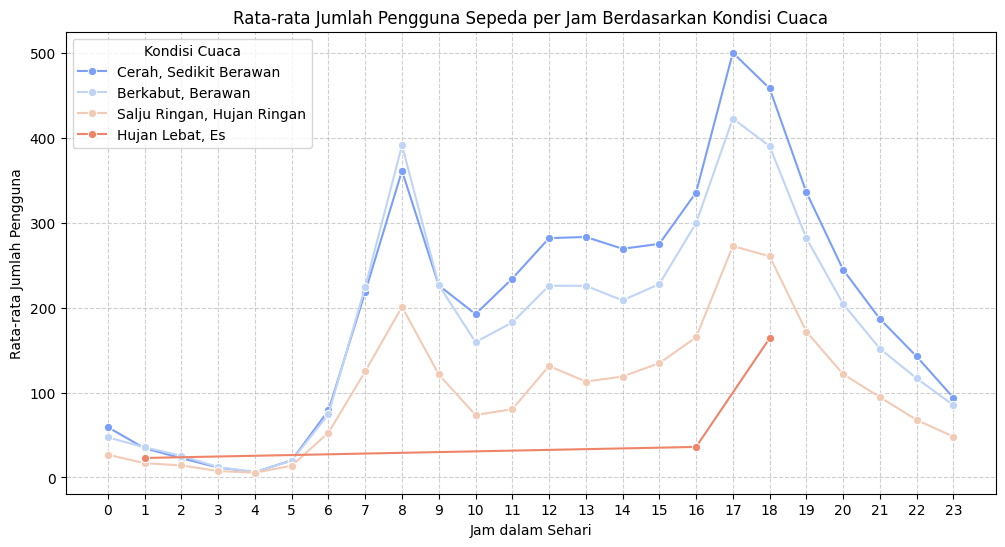

In [622]:
# Kelompokkan berdasarkan jam dan kondisi cuaca, lalu hitung rata-rata jumlah pengguna sepeda
hourly_weather = df.groupby(['hr', 'weathersit'])['cnt'].mean().reset_index()

# Mapping kondisi cuaca ke label deskriptif
hourly_weather['weathersit'] = hourly_weather['weathersit'].map(weather_labels)

# Plot garis untuk menunjukkan pola per jam berdasarkan cuaca
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', hue='weathersit', data=hourly_weather, marker='o', palette='coolwarm')

# Tambahkan label dan judul
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Jumlah Pengguna')
plt.title('Rata-rata Jumlah Pengguna Sepeda per Jam Berdasarkan Kondisi Cuaca')
plt.xticks(range(0, 24))  # Set jam dari 0 sampai 23
plt.legend(title='Kondisi Cuaca')
plt.grid(True, linestyle='--', alpha=0.6)

# Tampilkan plot
plt.show()

### Pertanyaan 2 : Bagaimana pola penggunaan sepeda berdasarkan musim (season) di Washington D.C.?

In [623]:
# Memuat dataset
df = pd.read_csv("dashboard/all_data.csv")

# Mapping angka ke label musim sesuai dataset
season_labels = {
    1: "Musim Semi",
    2: "Musim Panas",
    3: "Musim Gugur",
    4: "Musim Dingin"
}

# Mengelompokkan data berdasarkan musim dan menghitung total penyewaan sepeda
seasonal_usage_df = df.groupby("season").agg({
    "cnt": "sum"
}).reset_index()

# Mengubah angka musim menjadi label musim
seasonal_usage_df["Musim"] = seasonal_usage_df["season"].map(season_labels)

# Rename kolom untuk kejelasan
seasonal_usage_df.rename(columns={
    "cnt": "total_rentals"
}, inplace=True)

# Menampilkan hasil
print(seasonal_usage_df.head())

   season  total_rentals         Musim
0     1.0       472271.0    Musim Semi
1     2.0       918617.0   Musim Panas
2     3.0      1061351.0   Musim Gugur
3     4.0       842438.0  Musim Dingin


C:\Users\Syafiq\AppData\Local\Temp\ipykernel_8936\3602636104.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


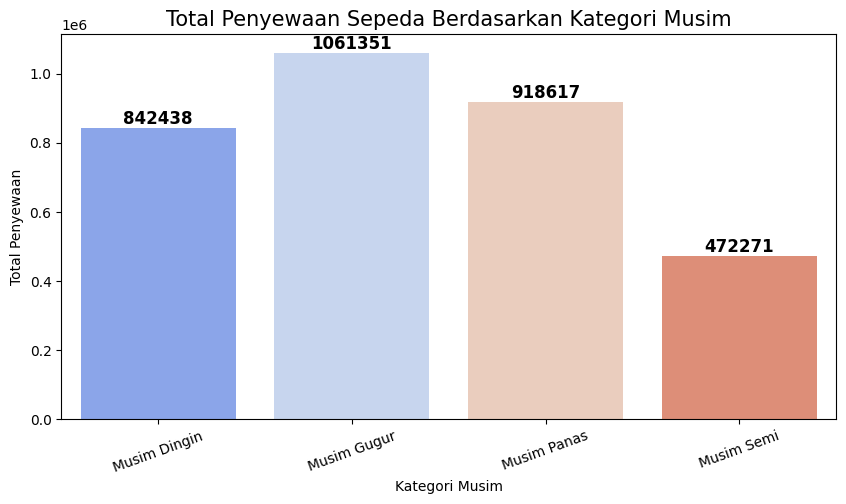

In [624]:
# Melakukan binning untuk kategori musim berdasarkan angka musim
def season_binning(season):
    if season == 1:  # Musim Semi 
        return "Musim Semi"
    elif season == 2:  # Musim Panas
        return "Musim Panas"
    elif season == 3:  # Musim Gugur
        return "Musim Gugur"
    elif season == 4:  # Musim Dingin
        return "Musim Dingin"
    else:
        return "Tidak Diketahui"

seasonal_usage_df["Kategori Musim"] = seasonal_usage_df["season"].apply(season_binning)

# Plot jumlah penyewaan sepeda berdasarkan kategori musim
plt.figure(figsize=(10, 5))
sns.barplot(
    y="total_rentals", 
    x="Kategori Musim",
    data=seasonal_usage_df.groupby("Kategori Musim").sum().reset_index(),
    palette="coolwarm"
)
plt.title("Total Penyewaan Sepeda Berdasarkan Kategori Musim", loc="center", fontsize=15)
plt.xlabel("Kategori Musim")
plt.ylabel("Total Penyewaan")
plt.xticks(rotation=20)

# Menampilkan angka di atas setiap batang
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.show()

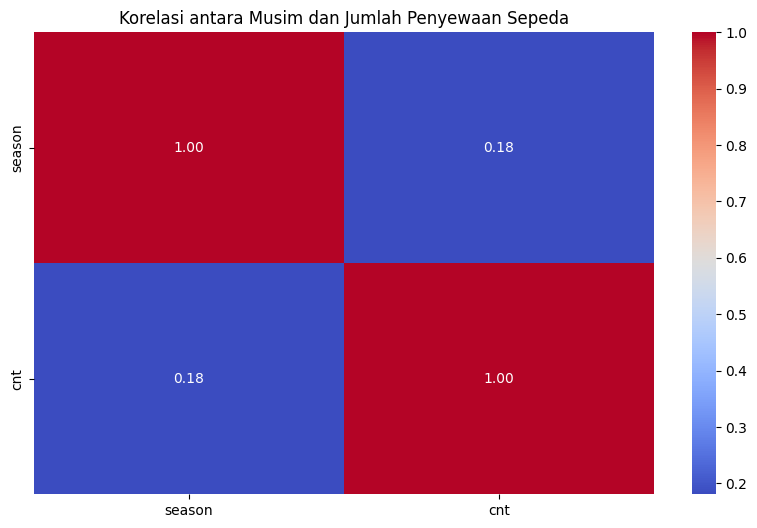

In [625]:
# Heatmap Korelasi antara musim dan jumlah penyewaan sepeda
korelasi_df = df[["season", "cnt"]].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(korelasi_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Korelasi antara Musim dan Jumlah Penyewaan Sepeda")
plt.show()


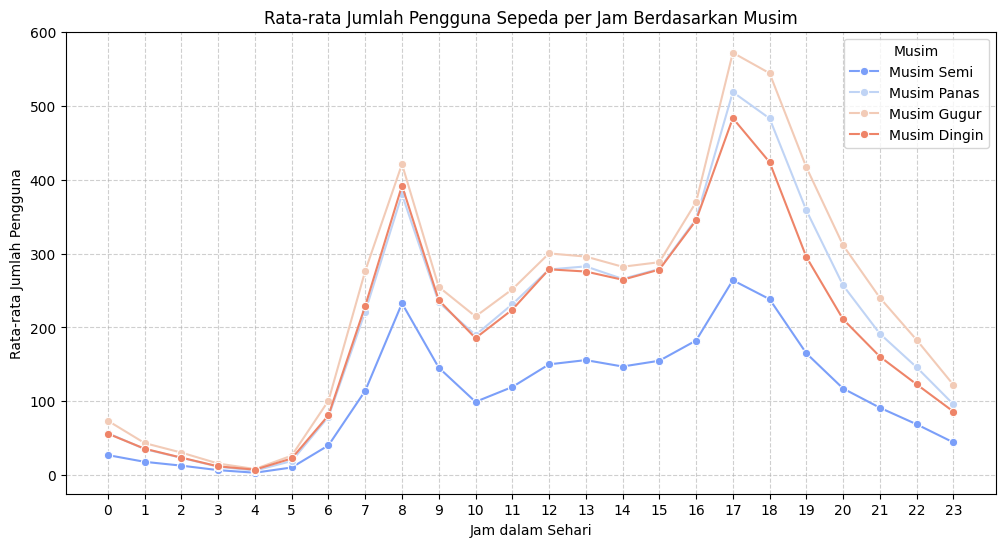

In [626]:
# Kelompokkan berdasarkan jam dan musim, lalu hitung rata-rata jumlah pengguna sepeda
hourly_season = df.groupby(['hr', 'season'])['cnt'].mean().reset_index()

# Mapping musim ke label deskriptif
hourly_season['season'] = hourly_season['season'].map(season_labels)

# Plot garis untuk menunjukkan pola per jam berdasarkan musim
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', hue='season', data=hourly_season, marker='o', palette='coolwarm')

# Tambahkan label dan judul
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Jumlah Pengguna')
plt.title('Rata-rata Jumlah Pengguna Sepeda per Jam Berdasarkan Musim')
plt.xticks(range(0, 24))  # Set jam dari 0 sampai 23
plt.legend(title='Musim')
plt.grid(True, linestyle='--', alpha=0.6)

# Tampilkan plot
plt.show()

### Pertanyaan 3 : Bagaimana tren penyewaan sepeda pada hari kerja dibandingkan dengan akhir pekan di Washington D.C.?

Pada pertanyaan ini memerlukan variabel temp,hum,wind,casual,registed,cnt,weekday,

In [627]:
# Mengelompokkan data berdasarkan hari kerja (0 = akhir pekan, 1 = hari kerja)
rental_trends_df = df.groupby('workingday').agg({
    "temp": "mean",
    "hum": "mean",
    "windspeed": "mean",
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).reset_index()

# Mengubah nama kolom agar lebih jelas
rental_trends_df.rename(columns={
    "cnt": "total_rentals",
    "casual": "casual_rentals",
    "registered": "registered_rentals"
}, inplace=True)

# Menampilkan hasil
rental_trends_df.head()

,workingday,temp,hum,windspeed,casual_rentals,registered_rentals,total_rentals
0,0.0,0.479978,0.624243,0.194195,316793.0,683902.0,1000695.0
1,1.0,0.502273,0.630803,0.189880,303389.0,1990593.0,2293982.0


C:\Users\Syafiq\AppData\Local\Temp\ipykernel_8936\3104333719.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_grouped_df = df.groupby(['temp_category', 'workingday']).agg({


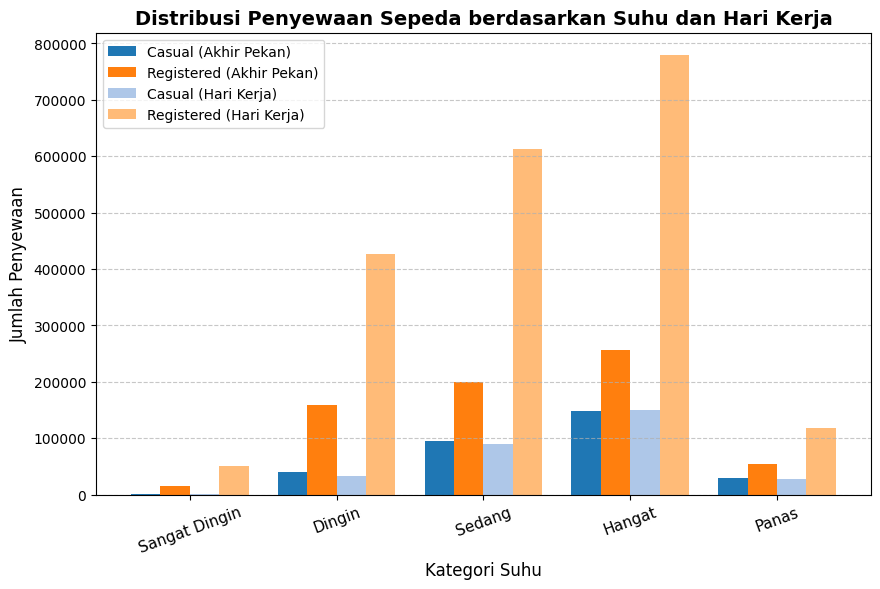

In [628]:
# Membuat binning untuk suhu
temp_bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
temp_labels = ['Sangat Dingin', 'Dingin', 'Sedang', 'Hangat', 'Panas']
df['temp_category'] = pd.cut(df['temp'], bins=temp_bins, labels=temp_labels)

# Mengelompokkan data berdasarkan kategori suhu dan hari kerja
temp_grouped_df = df.groupby(['temp_category', 'workingday']).agg({
    "casual": "sum",
    "registered": "sum"
}).reset_index()

# Membuat plot bar dengan setiap kategori memiliki dua batang terpisah
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
x = np.arange(len(temp_labels))

casual_weekend = temp_grouped_df[temp_grouped_df['workingday'] == 0]['casual']
registered_weekend = temp_grouped_df[temp_grouped_df['workingday'] == 0]['registered']
casual_weekday = temp_grouped_df[temp_grouped_df['workingday'] == 1]['casual']
registered_weekday = temp_grouped_df[temp_grouped_df['workingday'] == 1]['registered']

bars1 = ax.bar(x - bar_width * 1.5, casual_weekend, bar_width, label='Casual (Akhir Pekan)', color='#1f77b4')
bars2 = ax.bar(x - bar_width * 0.5, registered_weekend, bar_width, label='Registered (Akhir Pekan)', color='#ff7f0e')
bars3 = ax.bar(x + bar_width * 0.5, casual_weekday, bar_width, label='Casual (Hari Kerja)', color='#aec7e8')
bars4 = ax.bar(x + bar_width * 1.5, registered_weekday, bar_width, label='Registered (Hari Kerja)', color='#ffbb78')

ax.set_xlabel('Kategori Suhu', fontsize=12)
ax.set_ylabel('Jumlah Penyewaan', fontsize=12)
ax.set_title('Distribusi Penyewaan Sepeda berdasarkan Suhu dan Hari Kerja', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(temp_labels, fontsize=11)
ax.legend()
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=20)

plt.show()




## Conclusion


- Conclusion pertanyaan 1:
    1. Pengaruh Cuaca terhadap Penyewaan Sepeda

        - Secara umum, kondisi cuaca sangat memengaruhi jumlah penyewaan sepeda.
        - Cuaca yang cerah atau sedikit berawan memiliki jumlah penyewaan tertinggi. Sebaliknya, hujan lebat dan badai menyebabkan jumlah penyewaan menurun drastis.

    2. Kategori Cuaca dan Penyewaan Sepeda

        - Setelah melakukan binning terhadap kondisi cuaca, terlihat bahwa dalam cuaca baik, jumlah penyewaan sepeda jauh lebih tinggi dibandingkan dengan cuaca ekstrem.
        - Ini menunjukkan bahwa pengguna lebih memilih bersepeda saat kondisi cuaca mendukung.

    3. Korelasi antara Cuaca dan Penyewaan Sepeda

        - Dari heatmap korelasi, terdapat korelasi negatif antara kondisi cuaca yang lebih buruk dengan jumlah penyewaan sepeda. Artinya, semakin buruk kondisi cuaca, semakin sedikit sepeda yang disewa.

    4. Pengaruh Cuaca terhadap Penyewaan Sepeda Berdasarkan Jam

        - Pada cuaca cerah, jumlah penyewaan sepeda meningkat drastis terutama pada jam sibuk seperti pagi (sekitar pukul 08:00) dan sore (sekitar pukul 17:00).
        - Saat cuaca buruk atau ekstrem, pola penggunaan sepeda lebih tidak stabil dan jumlah penyewaan cenderung rendah sepanjang hari.



- Conclusion Pertanyaan 2 :

    1. Total Penyewaan Sepeda Berdasarkan Kondisi Cuaca

        - Penyewaan sepeda cenderung lebih tinggi pada kondisi cuaca yang lebih baik (Cerah, Sedikit Berawan).

        - Saat kondisi cuaca buruk (Salju Ringan, Hujan Ringan) atau ekstrem (Hujan Lebat, Es), jumlah penyewaan sepeda mengalami penurunan drastis.

        - Hal ini menunjukkan bahwa faktor cuaca sangat memengaruhi keputusan pengguna dalam menyewa sepeda.

    2. Korelasi antara Kondisi Cuaca dan Jumlah Penyewaan Sepeda

        - Hasil heatmap korelasi menunjukkan adanya hubungan negatif antara kondisi cuaca ekstrem dan jumlah penyewaan sepeda.

        - Semakin buruk kondisi cuaca, semakin sedikit jumlah sepeda yang disewa.

        - Korelasi ini memperkuat temuan bahwa cuaca menjadi faktor penting dalam menentukan volume penyewaan sepeda harian.

    3. Pola Rata-rata Pengguna Sepeda per Jam Berdasarkan Kondisi Cuaca

        - Pada hari dengan cuaca baik, jumlah penyewaan sepeda meningkat drastis terutama pada jam sibuk (pagi hari sekitar pukul 7-9 dan sore hari sekitar pukul 17-19).

        - Pada hari dengan cuaca ekstrem, penyewaan sepeda lebih rendah secara konsisten sepanjang hari.

        - Tren ini menunjukkan bahwa selain faktor cuaca, waktu dalam sehari juga memainkan peran penting dalam tingkat penyewaan sepeda.

    4. Pola Rata-rata Pengguna Sepeda per Jam Berdasarkan Musim

        - Pada musim panas dan musim semi, rata-rata jumlah pengguna sepeda lebih tinggi dibandingkan musim dingin dan musim gugur.

        - Musim dingin menunjukkan jumlah penyewaan yang lebih rendah, kemungkinan besar karena suhu dingin dan kondisi yang kurang nyaman bagi pesepeda.

        - Musim semi dan musim panas menjadi waktu yang paling optimal untuk bersepeda, terutama pada jam sibuk pagi dan sore hari.


- Conclusion Pertanyaan 3: 
    1. Tren Penyewaan Sepeda pada Hari Kerja vs Akhir Pekan

        Dari analisis jumlah penyewaan sepeda berdasarkan hari kerja dan akhir pekan, terlihat bahwa:
        - Penyewaan oleh pengguna terdaftar (registered) lebih tinggi pada hari kerja dibandingkan akhir pekan. Hal ini menunjukkan bahwa sebagian besar pengguna terdaftar menggunakan sepeda untuk keperluan rutin seperti bekerja atau sekolah.
        - Sebaliknya, penyewaan oleh pengguna kasual (casual) lebih tinggi pada akhir pekan, mengindikasikan bahwa banyak orang menyewa sepeda untuk rekreasi atau aktivitas santai saat libur.
    2. Pengaruh Suhu terhadap Penyewaan Sepeda
    
        Dari distribusi penyewaan berdasarkan kategori suhu, dapat disimpulkan bahwa:
        - Pada suhu sedang hingga hangat, jumlah penyewaan sepeda mencapai puncaknya. Ini menunjukkan bahwa cuaca yang nyaman meningkatkan minat orang untuk bersepeda.
        - Pada suhu sangat dingin dan panas, jumlah penyewaan turun drastis. Ini masuk akal karena kondisi ekstrem cenderung mengurangi kenyamanan saat bersepeda.